# Cabs Project

## Introduction


The present document is a study on data about cabs in Chicago. The data has been extracted from a Database of cab rides in November 2017. Our main objective is to find patterns regarding taxi companies, dropoff locations and the effects of weather on rides. This work will be used as intelligence to plan out a marketing campaign and a new transportation project for the O'Hare airport to better solve traffic issues during rush hours.


## Data Preprocess

### Objective


Three tables were provided in order to conduct our studies:

Company - information on companies and the amount of trips during November 15 and 16 of 2017.

Dropoff - Drop off neighborhoods and the average number of trips ending at each during November 2017.

Weather - weather conditions during rides from Loop to the O'Hare Airport.


The first step is to explore data and validate information. Data often comes with a few unpredicted issues, and these will be fixed in this preprocessing section.  These can include missing values, artifacts and incorrect data types. We will take a first look at the data and the information available while making sure the values are correctly loaded: numeric data should correctly be assigned as integer or float, corresponding to their values. Likewise, dates must also be correctly parsed by the software. Analysis is much easier when the data is standardized and categorized. At the end of this section, we expect to have data ready for analysis and the drawing of results.

### Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy
import scipy.stats as st


path_array = ['', '/', '/datasets/', './datasets/', '../datasets/']
CSVPATH = None

for i in path_array:
    try:
        pd.read_csv(i + 'project_sql_result_01.csv', nrows=1)
        CSVPATH = i
    except:
        pass

if CSVPATH:
    print('Path found is', 'current folder' if CSVPATH == '' else CSVPATH)
else:
    print('No path found')

Path found is /datasets/


In [2]:
def optimize_types(df):
    df_dtypes = df.dtypes
    df_names = df.index
    df_types = [i.name for i in df_dtypes.values]
    df_types = dict(zip(df_names, df_types))
    return df_types

In [3]:
company = pd.read_csv(CSVPATH + 'project_sql_result_01.csv', nrows=10)

company['trips_amount'] = pd.to_numeric(company['trips_amount'], downcast='integer')

company_types = optimize_types(company)

company = pd.read_csv(
    CSVPATH+'project_sql_result_01.csv', 
    dtype=company_types)

company.info()
company.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int16
dtypes: int16(1), object(1)
memory usage: 768.0+ bytes


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
dropoff = pd.read_csv(CSVPATH + 'project_sql_result_04.csv', nrows=10)
dropoff['average_trips'] = pd.to_numeric(dropoff['average_trips'], downcast='float')

dropoff_types = optimize_types(dropoff)

dropoff = pd.read_csv(
    CSVPATH+'project_sql_result_04.csv', 
    dtype=dropoff_types)

dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float32
dtypes: float32(1), object(1)
memory usage: 1.2+ KB


In [5]:
weather = pd.read_csv(CSVPATH + 'project_sql_result_07.csv')

weather['duration_seconds'] = pd.to_numeric(weather['duration_seconds'], downcast='integer')

weather_types = optimize_types(weather)

weather = pd.read_csv(
    CSVPATH+'project_sql_result_07.csv', 
    dtype=weather_types,
    parse_dates=['start_ts'],
    infer_datetime_format='%Y-%m-%d %H:%M:%S')

weather.info()
weather['day_hour'] = weather['start_ts'].apply(lambda x: x.hour)
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int16
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


,start_ts,weather_conditions,duration_seconds,day_hour
0,2017-11-25 16:00:00,Good,2410,16
1,2017-11-25 14:00:00,Good,1920,14
2,2017-11-25 12:00:00,Good,1543,12
3,2017-11-04 10:00:00,Good,2512,10
4,2017-11-11 07:00:00,Good,1440,7


In [6]:
n_duplicated = weather[weather.duplicated()].shape[0]
print('Number of duplicates on weather: ' + str(n_duplicated))
print(f'Percentage: {n_duplicated/weather.shape[0]:.2%}')

Number of duplicates on weather: 197
Percentage: 18.45%


In [7]:
weather = weather.drop_duplicates().reset_index(drop=True)

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 4 columns):
start_ts              871 non-null datetime64[ns]
weather_conditions    871 non-null object
duration_seconds      871 non-null int16
day_hour              871 non-null int64
dtypes: datetime64[ns](1), int16(1), int64(1), object(1)
memory usage: 22.2+ KB


### Results

Since the data has been acquired from a Database, not many issues were found. However, we found 18% of the data about weather were duplicated data, and we can't be sure if some of these entries were only coincidences. Since that percetage is quite significant, and the duration in seconds is not so likely to be exactly the same along with the start time, we have decided to drop duplicates.

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Alright, the data was loaded and inspected. You have a good point about duplicates, without ride IDs we can't know for sure if these are distinct rides. Dropping seems reasonable to me!
  
</div>


## Exploratory Data Analysis



### Objective


In this section, we ain to draw conclusions from the data. We aim to draw graphs about leading cab companies, most visited locations and differences in ride durations based on good or bad weather.


### Code

In [8]:
top_companies = company.sort_values('trips_amount', ascending=False).head(10)
display(top_companies)
company.describe().round(decimals=2)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


,trips_amount
count,64.00
mean,2145.48
std,3812.31
min,2.00
25%,20.75
50%,178.50
75%,2106.50
max,19558.00


In [9]:
print(f'Percentage of trips from top companies: {top_companies["trips_amount"].sum()/company["trips_amount"].sum():.2%}')

Percentage of trips from top companies: 72.30%


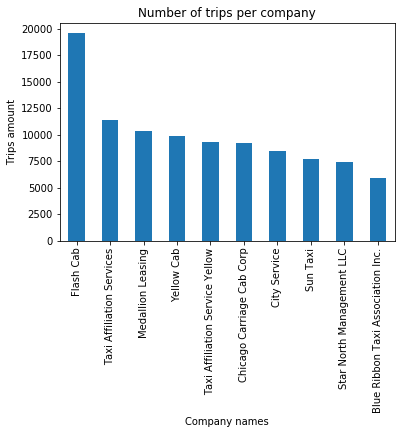

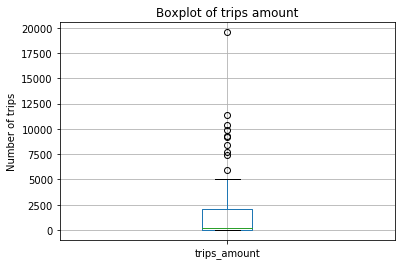

In [10]:
top_companies.set_index('company_name').plot(kind='bar')
plt.gca().legend_ = None
plt.xlabel('Company names')
plt.ylabel('Trips amount')
plt.title('Number of trips per company')
plt.show()
company.boxplot()
plt.title('Boxplot of trips amount')
plt.ylabel('Number of trips')
plt.show()

*Graph Analysis*

By looking at the first graph, we can check the 10 leading companies in trip amounts. The top company is Flash Cab, with almost twice as many rides as the second place. Although these companies sum more than 5,000 trips, most of the 64 companies analyzed sum less than 2,500 rides. The top companies, in the overall scene, can be considered outliers in the business, and that can be confirmed by the second boxplot graph.

In [11]:
top_dropoff = dropoff.sort_values('average_trips', ascending=False).head(10)
display(top_dropoff)
dropoff.describe()

,dropoff_location_name,average_trips
0,Loop,10727.466797
1,River North,9523.666992
2,Streeterville,6664.666504
3,West Loop,5163.666504
4,O'Hare,2546.899902
5,Lake View,2420.966553
6,Grant Park,2068.533447
7,Museum Campus,1510.000000
8,Gold Coast,1364.233276
9,Sheffield & DePaul,1259.766724


,average_trips
count,94.000000
mean,599.953735
std,1714.591064
min,1.800000
25%,14.266667
50%,52.016666
75%,298.858330
max,10727.466797


In [12]:
print(f'Percentage of trips from most visited locations: {top_dropoff["average_trips"].sum()/dropoff["average_trips"].sum():.2%}')

Percentage of trips from most visited locations: 76.69%


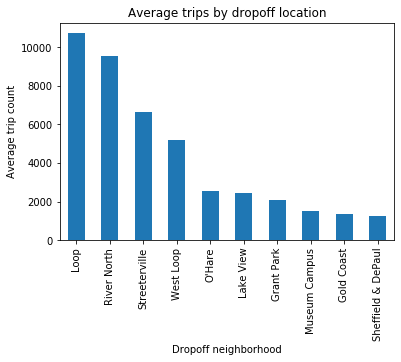

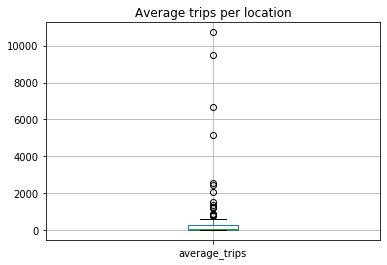

In [13]:
top_dropoff.set_index('dropoff_location_name').plot(kind='bar')
plt.gca().legend_ = None
plt.xlabel('Dropoff neighborhood')
plt.ylabel('Average trip count')
plt.title('Average trips by dropoff location')
plt.show()
dropoff.boxplot()
plt.title('Average trips per location')
plt.show()

*Graph Analysis*

By taking a look at the average number of trips per location, we can define that the main destinations are Loop, River North, Streeterville and Westloop. These four destinations count more than twice the fifth most visited destination, which is O'Hare, the neighborhood where the airport is. Most destinations count less than 300 average trips.

In [14]:
weather = weather.query('duration_seconds > 60')
weather.groupby('weather_conditions').describe().transpose().round(2)

weather_conditions          Bad     Good
duration_seconds count   148.00   716.00
                 mean   2409.23  2052.04
                 std     751.54   750.72
                 min     480.00   420.00
                 25%    1746.00  1440.00
                 50%    2463.50  1918.00
                 75%    2940.00  2497.75
                 max    4980.00  7440.00
day_hour         count   148.00   716.00
                 mean     13.30    11.15
                 std       3.85     4.16
                 min       0.00     0.00
                 25%      10.00     8.00
                 50%      13.00    11.00
                 75%      16.00    14.00
                 max      21.00    23.00

In [ ]:
weather_by_hour = weather.pivot_table(
    index='day_hour', 
    columns='weather_conditions', 
    values='duration_seconds',
    aggfunc=['mean', 'count']
)

weather_by_hour

In [ ]:
good = weather.query('weather_conditions == "Good"').sort_values('day_hour')
bad = weather.query('weather_conditions == "Bad"').sort_values('day_hour')
(
good.groupby('day_hour')['duration_seconds'].mean().to_frame(name='Good').join(
bad.groupby('day_hour')['duration_seconds'].mean().to_frame(name='Bad'))
).plot(kind='bar', figsize=(10,4))
plt.gca().legend().set_title('Weather conditions')
plt.xlabel('Hour of the day')
plt.ylabel('Average duration (s)')
plt.title('Duration of rides by hour of the day')
plt.show()

*Graph Analysis*

The graph above shows the progression of mean duration along the day according to the weather. If no information is available, then there aren't any readings for the corresponding weather condition during that hour on the days analyzed. We can see that the means do not vary that much according to the weather, and we can only say state that the mean is higher during bad weather conditions during the afternoon. This hypothesis will be further analyzed in the next section.

### Results

By inspecting the data and plotting a few graphs, we were able to visualize the top companies and locations visited pointed by the data regarding trip counts. 

The ten leading companies in trip amounts stand out from the others by reaching from two to five times the average number of trips throughout companies. They hold up a total of 74% of the trip amounts, in a local market with 64 competing businesses.

As for locations, the 10 most visited locations also hold up a share of 76% of the trip counts, with Loop leading by more than twice the average visits of the second place. Up next are River North, Streeterville and Westloop.

## Hypothesis Testing

### Objective

After studying the graph of trip durations and respective weather conditions, we have formulated a hypothesis that the average duration is higher during bad weather. However, considering rush hours we can expect that the effects of bad weather will be different thoughout the day. 

We will formulate the following null hypothesis:

'The average duration of rides during bad weather is the same as the average duration during good weather'

Opposed to the alternative hypothesis:

'The average duration of rides during bad weather is higher than the average duration during good weather.'
 
We will check the hypothesis for the two cases:
    
- Daily
- Hourly

We will check the probabilities of getting samples results as extreme as the other sample based on one of the sample batch and decide that if the probabilities are less than 5%, then they are highly unlikely to be true and will be considered false. The two sample batches are trips during good weather and bad weather.

The data considered is for any Saturday of November 2017 and we will apply the one-tailed T-test.

### Code

In [ ]:
alpha = 0.05

In [ ]:
hours_bad_data_available = bad.groupby('day_hour').count().query('start_ts > 10')['start_ts'].index

hours_bad_data_available.values

In [ ]:
p_value_array = []

for hour in hours_bad_data_available:
    p_value_array.append(
        st.ttest_ind(
            bad.query('day_hour == @hour')['duration_seconds'].values, 
            good.query('day_hour == @hour')['duration_seconds'].values, 
            equal_var=False
        ).pvalue/2
    )

print('Running the Student\'s test for the values of good weather and bad weather by hour.')
pd.Series(index=hours_bad_data_available, data=p_value_array, name='p_values')

In [ ]:
hour_array = [12, 13, 16]
raise_in_mean = 0
for hour in hour_array:
    raise_in_mean += (
        bad[ bad['day_hour'] == hour]['duration_seconds'].mean()
        /
        good[ good['day_hour'] == hour]['duration_seconds'].mean()
    )

raise_in_mean /= 3
print(f"The raise in trip durations due to bad weather is {raise_in_mean - 1:.2%}")

In [ ]:
result = st.ttest_ind(
    good.query('day_hour.isin(@hours_bad_data_available)')['duration_seconds'].values,
    bad.query('day_hour.isin(@hours_bad_data_available)')['duration_seconds'].values,
    equal_var=False
)

print('Running the Student\'s test for the values of good weather and bad weather through the whole day.')
print(f'The resulting p-value is {result.pvalue/2:.2f}')
if result.pvalue > alpha:
    print('It is too high, so the null hypothesis can\'t be rejected. The batches could come from the same populations')
else:
    print('It is too low, the null hypothesis is rejected. The batches probably come from different populations')

### Results

We have come to the conclusion that the average duration during good and bad weather conditions are not the same when they are analyzed hourly. More precisely, the biggest change is during the afternoon, where the duration raise by about 26% during bad weather when compared to good weather. This has been done by calculating how likely it is to obtain the measurements equal to the data gathered for bad weather if we were to consider only good weather. The probability calculated was 0%, which means there is enough evidence that they are not the same.

It is important to note that if we were only to consider the means for each hour and group them to analyze, we could end up with the idea that there isn't much difference. However, this would be a mistake, as we would be reducing the size of our sample batch to the 24 hours of the day and computing the variance of samples over the averages, and not the variance over all samples.

## Conclusion

The data provided was used to draw conclusions on the leading companies and most visited locations in Chicago by cab rides. We found out the ten dominant companies which hold up 74% of the amounts of trips, leaded by Flash Cab. This market intelligence can be useful for defining how the companies in this business should be tackled, as most of the rides are made by about 15% of the 64 companies.

Furthermore, we could define the most visited locations in Chicago, and the O'Hare airport neighborhood is in fifth place. The other 4 locations have steep rising curve of average trips, leaded by Loop. Public projects could use this information to point out notable locations to work on.

Lastly, we have statistically confirmed that bad weather has an effect on durations of rides to the  airport, although the effects are most prominent during the afternoon. The average ride duration is increased by about 26%, while these effects are much lower during the morning. It is important to note that only data from the saturdays of November 2017 was used, and no rides were done during bad weather in the mornings. This was probably due to consistent good weather.